In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [13]:
ev_data = pd.read_csv('/content/drive/MyDrive/volkswagen_e_golf.csv')
ev_data

,manufacturer,model,version,power(kW),fuel_date,trip_distance(km),quantity(kWh),fuel_type,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation
0,Volkswagen,Golf,e-Golf,85,08.02.2019,80,NaN,Electricity,Winter tires,0,0,1,Normal,17.8,0,1,53.0,1.0
1,Volkswagen,Golf,e-Golf,85,06.02.2019,50,12.29,Electricity,Winter tires,0,0,1,Normal,15.5,0,1,47.0,-1.3
2,Volkswagen,Golf,e-Golf,85,05.02.2019,43,8.68,Electricity,Winter tires,0,1,1,Normal,18.0,0,1,58.0,1.2
3,Volkswagen,Golf,e-Golf,85,04.02.2019,44,1.50,Electricity,Winter tires,0,1,1,Normal,16.1,0,1,43.0,-0.7
4,Volkswagen,Golf,e-Golf,85,04.02.2019,76,14.44,Electricity,Winter tires,0,1,0,Normal,19.0,0,1,76.0,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3340,Volkswagen,Golf,e-Golf,85,20.12.2014,26,5.62,Electricity,Winter tires,1,1,1,Normal,21.6,1,0,45.0,4.8
3341,Volkswagen,Golf,e-Golf,85,20.12.2014,77,14.25,Electricity,Winter tires,1,1,1,Normal,18.5,1,0,42.0,1.7
3342,Volkswagen,Golf,e-Golf,85,19.12.2014,26,4.97,Electricity,Winter tires,1,1,1,Normal,19.1,1,0,23.0,2.3
3343,Volkswagen,Golf,e-Golf,85,19.12.2014,20,4.76,Electricity,Winter tires,1,1,1,Fast,23.8,1,0,46.0,7.0


In [19]:
# Changing datatypes of columns
ev_data['city'] = ev_data['city'].astype('object')
ev_data['motor_way'] = ev_data['motor_way'].astype('object')
ev_data['country_roads'] = ev_data['country_roads'].astype('object')
ev_data['A/C'] = ev_data['A/C'].astype('object')
ev_data['park_heating'] = ev_data['park_heating'].astype('object')
if ev_data['trip_distance(km)'].dtypes == 'object':
  ev_data['trip_distance(km)']= ev_data['trip_distance(km)'].str.split(",").str[0]
ev_data['trip_distance(km)']= ev_data['trip_distance(km)'].astype('float')

In [20]:
categorical_columns = [col for col in ev_data.columns if pd.api.types.is_categorical_dtype(ev_data[col]) or ev_data[col].dtype == 'object']

# Fill NaN values in categorical columns with the majority (mode) value
for column in categorical_columns:
    mode_value = ev_data[column].mode()[0]  # Get the mode value of the column
    ev_data[column].fillna(mode_value, inplace=True)

In [21]:
numerical_columns = ev_data.select_dtypes(include=['int64','float64']).columns

# Create the SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the numerical columns
ev_data[numerical_columns] = imputer.fit_transform(ev_data[numerical_columns])

# **Univariate Analysis**

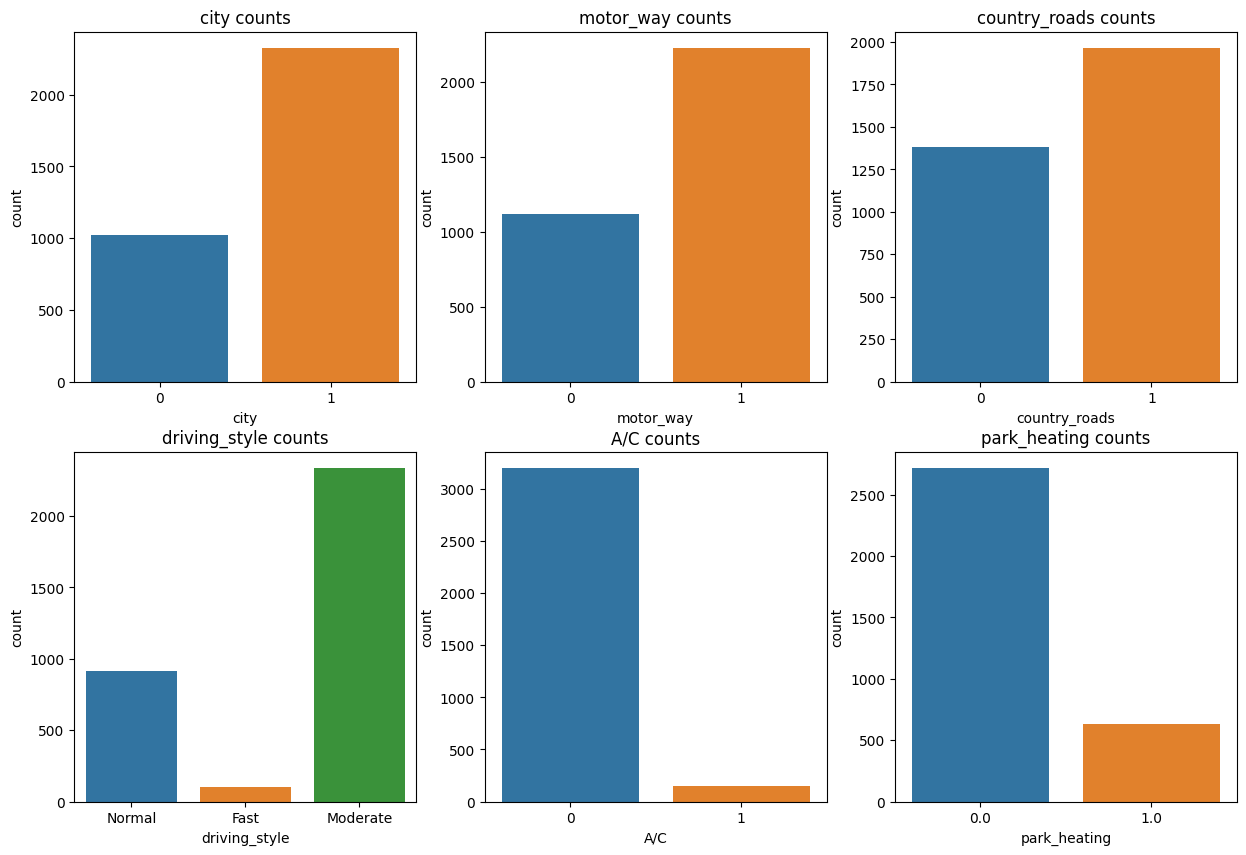

In [80]:
columns = ['city','motor_way','country_roads','driving_style','A/C','park_heating']
plt.figure(figsize=(15, 10))
for i in range(0,len(columns)):
  plt.subplot(2, 3, i+1)
  plt.title(columns[i]+' '+"counts")
  sns.countplot(x=ev_data[columns[i]])
plt.show()

<ipython-input-28-27d5eb3d9c42>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ev_data[columns[i]],kde=True)


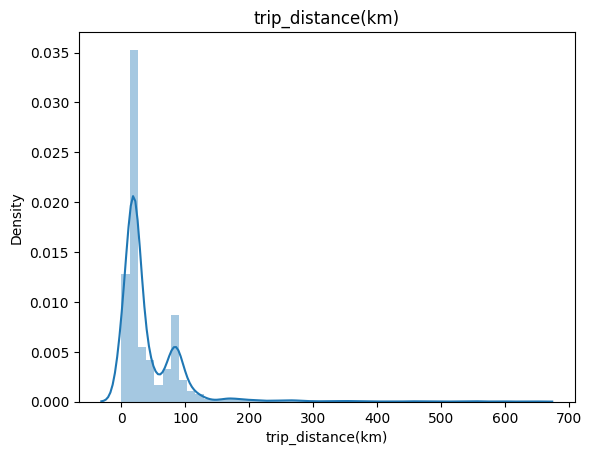

<ipython-input-28-27d5eb3d9c42>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ev_data[columns[i]],kde=True)


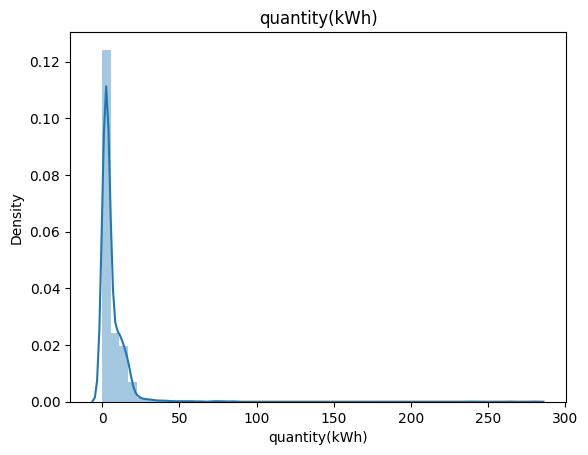

<ipython-input-28-27d5eb3d9c42>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ev_data[columns[i]],kde=True)


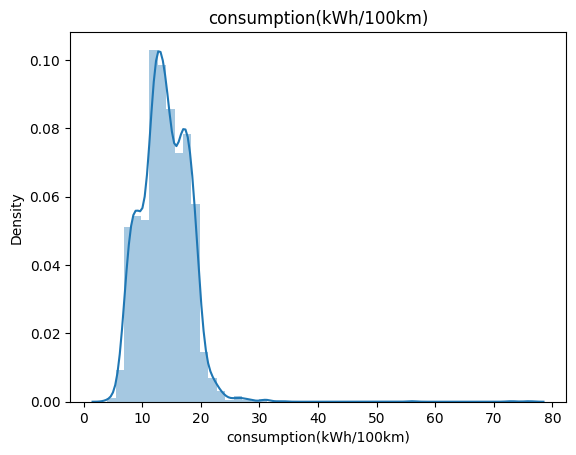

<ipython-input-28-27d5eb3d9c42>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ev_data[columns[i]],kde=True)


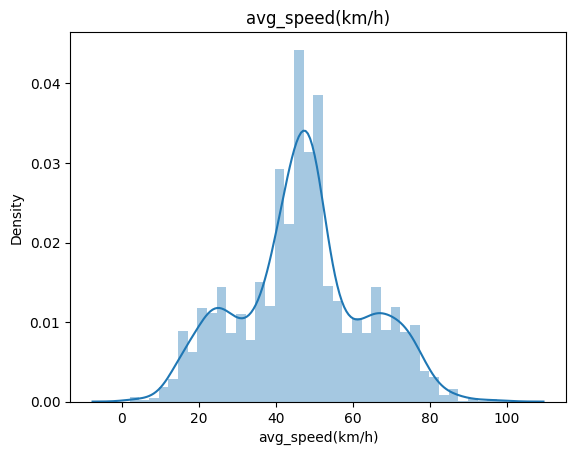

<ipython-input-28-27d5eb3d9c42>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ev_data[columns[i]],kde=True)


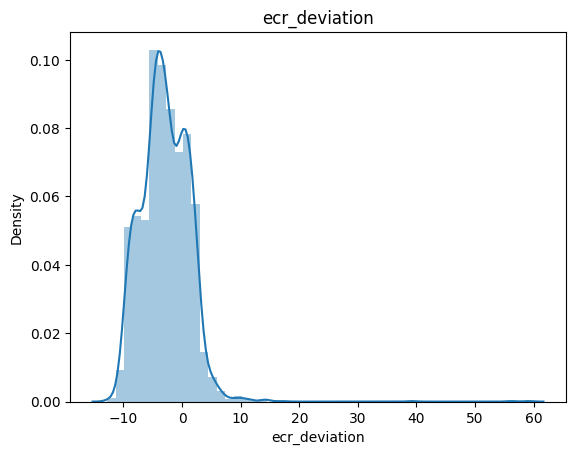

In [28]:
columns = ev_data.select_dtypes(exclude='object').columns
for i in range(1,len(columns)):
  sns.distplot(ev_data[columns[i]],kde=True)
  plt.title(columns[i])
  plt.show()

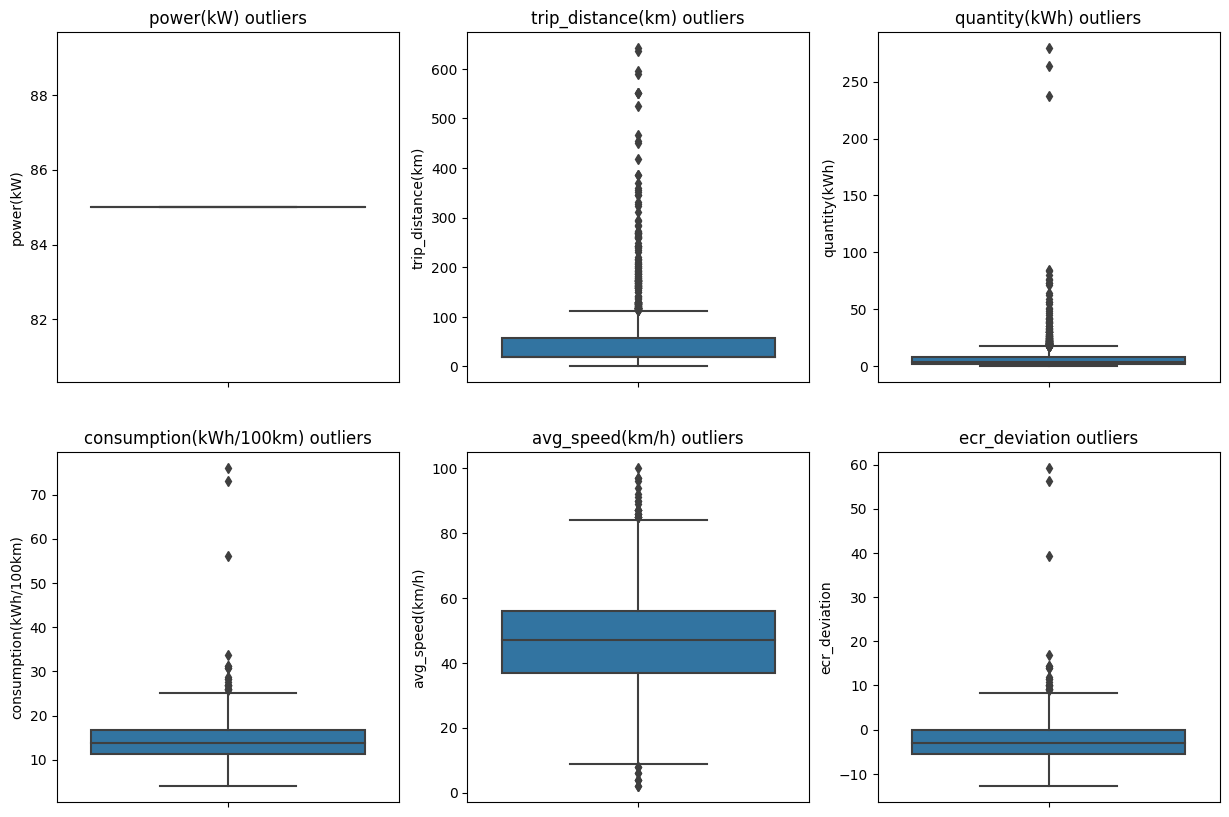

In [83]:
columns = ['power(kW)','trip_distance(km)','quantity(kWh)','consumption(kWh/100km)','avg_speed(km/h)','ecr_deviation']
plt.figure(figsize=(15, 10))
for i in range(0,len(columns)):
  plt.subplot(2, 3, i+1)
  plt.title(columns[i]+' '+"outliers")
  sns.boxplot(y=ev_data[columns[i]])
plt.show()

# **Bivariate Analysis**

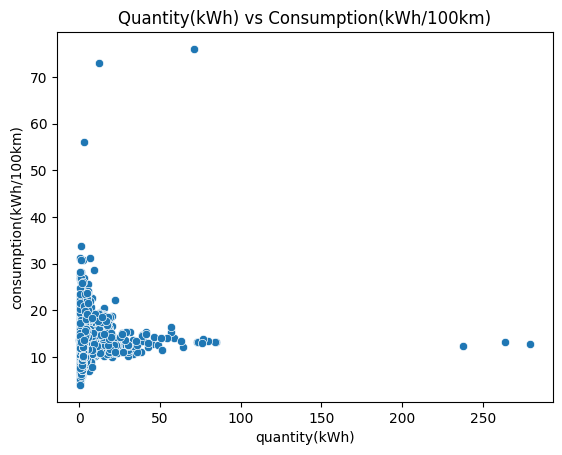

In [42]:
plt.title("Quantity(kWh) vs Consumption(kWh/100km)")
sns.scatterplot(x = 'quantity(kWh)', y = 'consumption(kWh/100km)', data = ev_data)
plt.show()

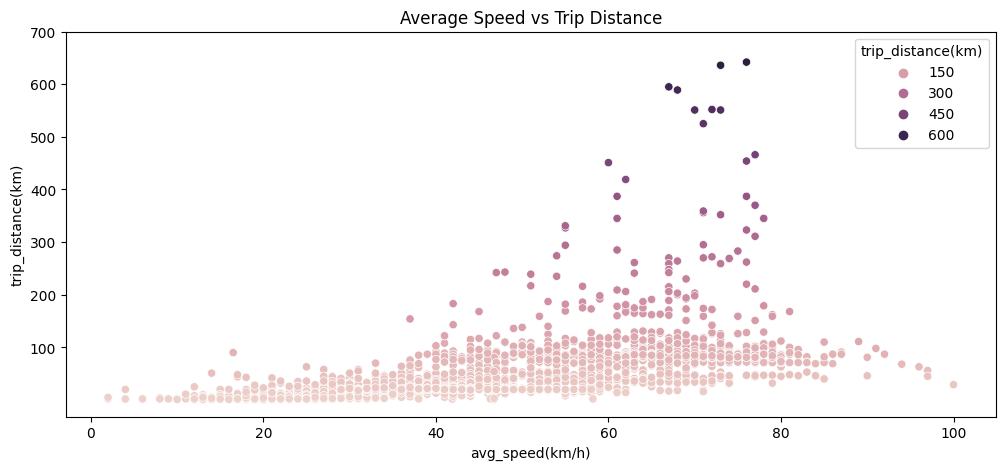

In [68]:
plt.figure(figsize=(12, 5))
y = [100,200,300,400,500,600,700]
labels = [100,200,300,400,500,600,700]
plt.title("Average Speed vs Trip Distance")
sns.scatterplot(x = 'avg_speed(km/h)', y = 'trip_distance(km)', data = ev_data, hue='trip_distance(km)')
plt.yticks(y,labels)
plt.show()

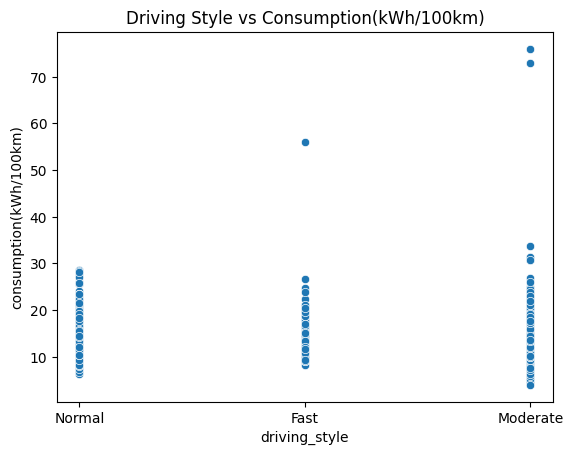

In [46]:
plt.title("Driving Style vs Consumption(kWh/100km)")
sns.scatterplot(x = 'driving_style', y = 'consumption(kWh/100km)', data = ev_data)
plt.show()

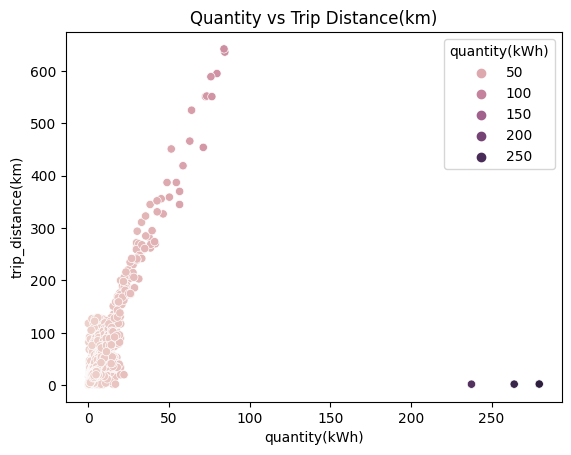

In [67]:
plt.title("Quantity vs Trip Distance(km)")
sns.scatterplot(x = 'quantity(kWh)', y = 'trip_distance(km)', data = ev_data, hue='quantity(kWh)')
plt.show()

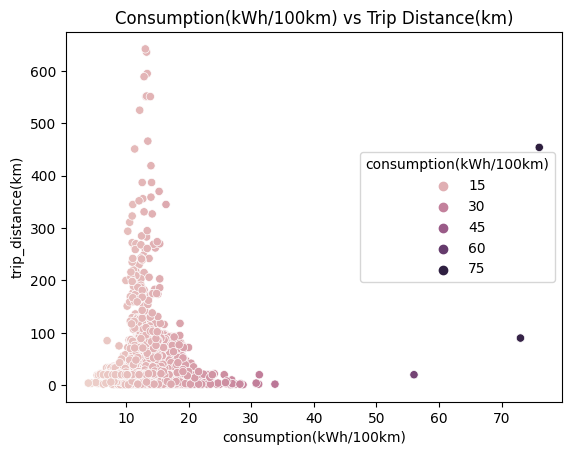

In [66]:
plt.title("Consumption(kWh/100km) vs Trip Distance(km)")
sns.scatterplot(x = 'consumption(kWh/100km)', y = 'trip_distance(km)', data = ev_data, hue='consumption(kWh/100km)')
plt.show()

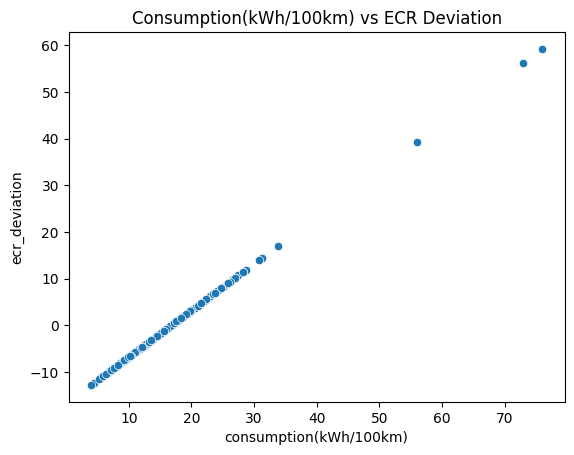

In [53]:
plt.title("Consumption(kWh/100km) vs ECR Deviation")
sns.scatterplot(x = 'consumption(kWh/100km)', y = 'ecr_deviation', data = ev_data)
plt.show()

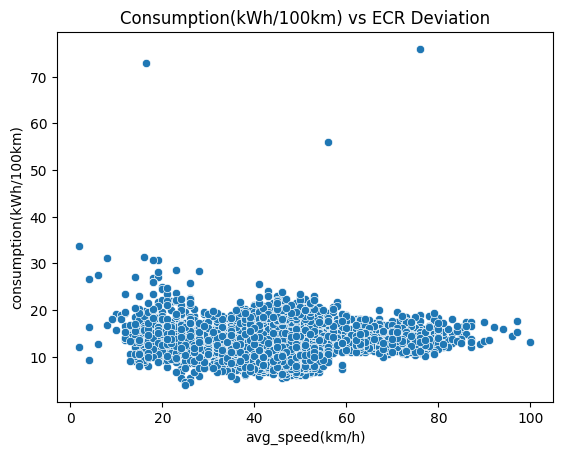

In [61]:
plt.title("Consumption(kWh/100km) vs ECR Deviation")
sns.scatterplot(x = 'avg_speed(km/h)', y = 'consumption(kWh/100km)', data = ev_data)
plt.show()

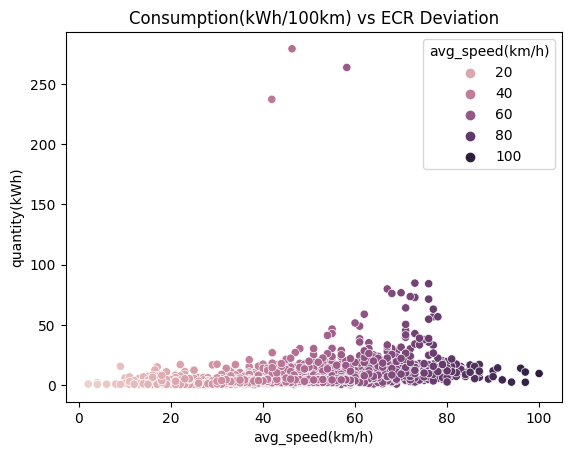

In [65]:
plt.title("Consumption(kWh/100km) vs ECR Deviation")
sns.scatterplot(x = 'avg_speed(km/h)', y = 'quantity(kWh)', data = ev_data)
plt.show()

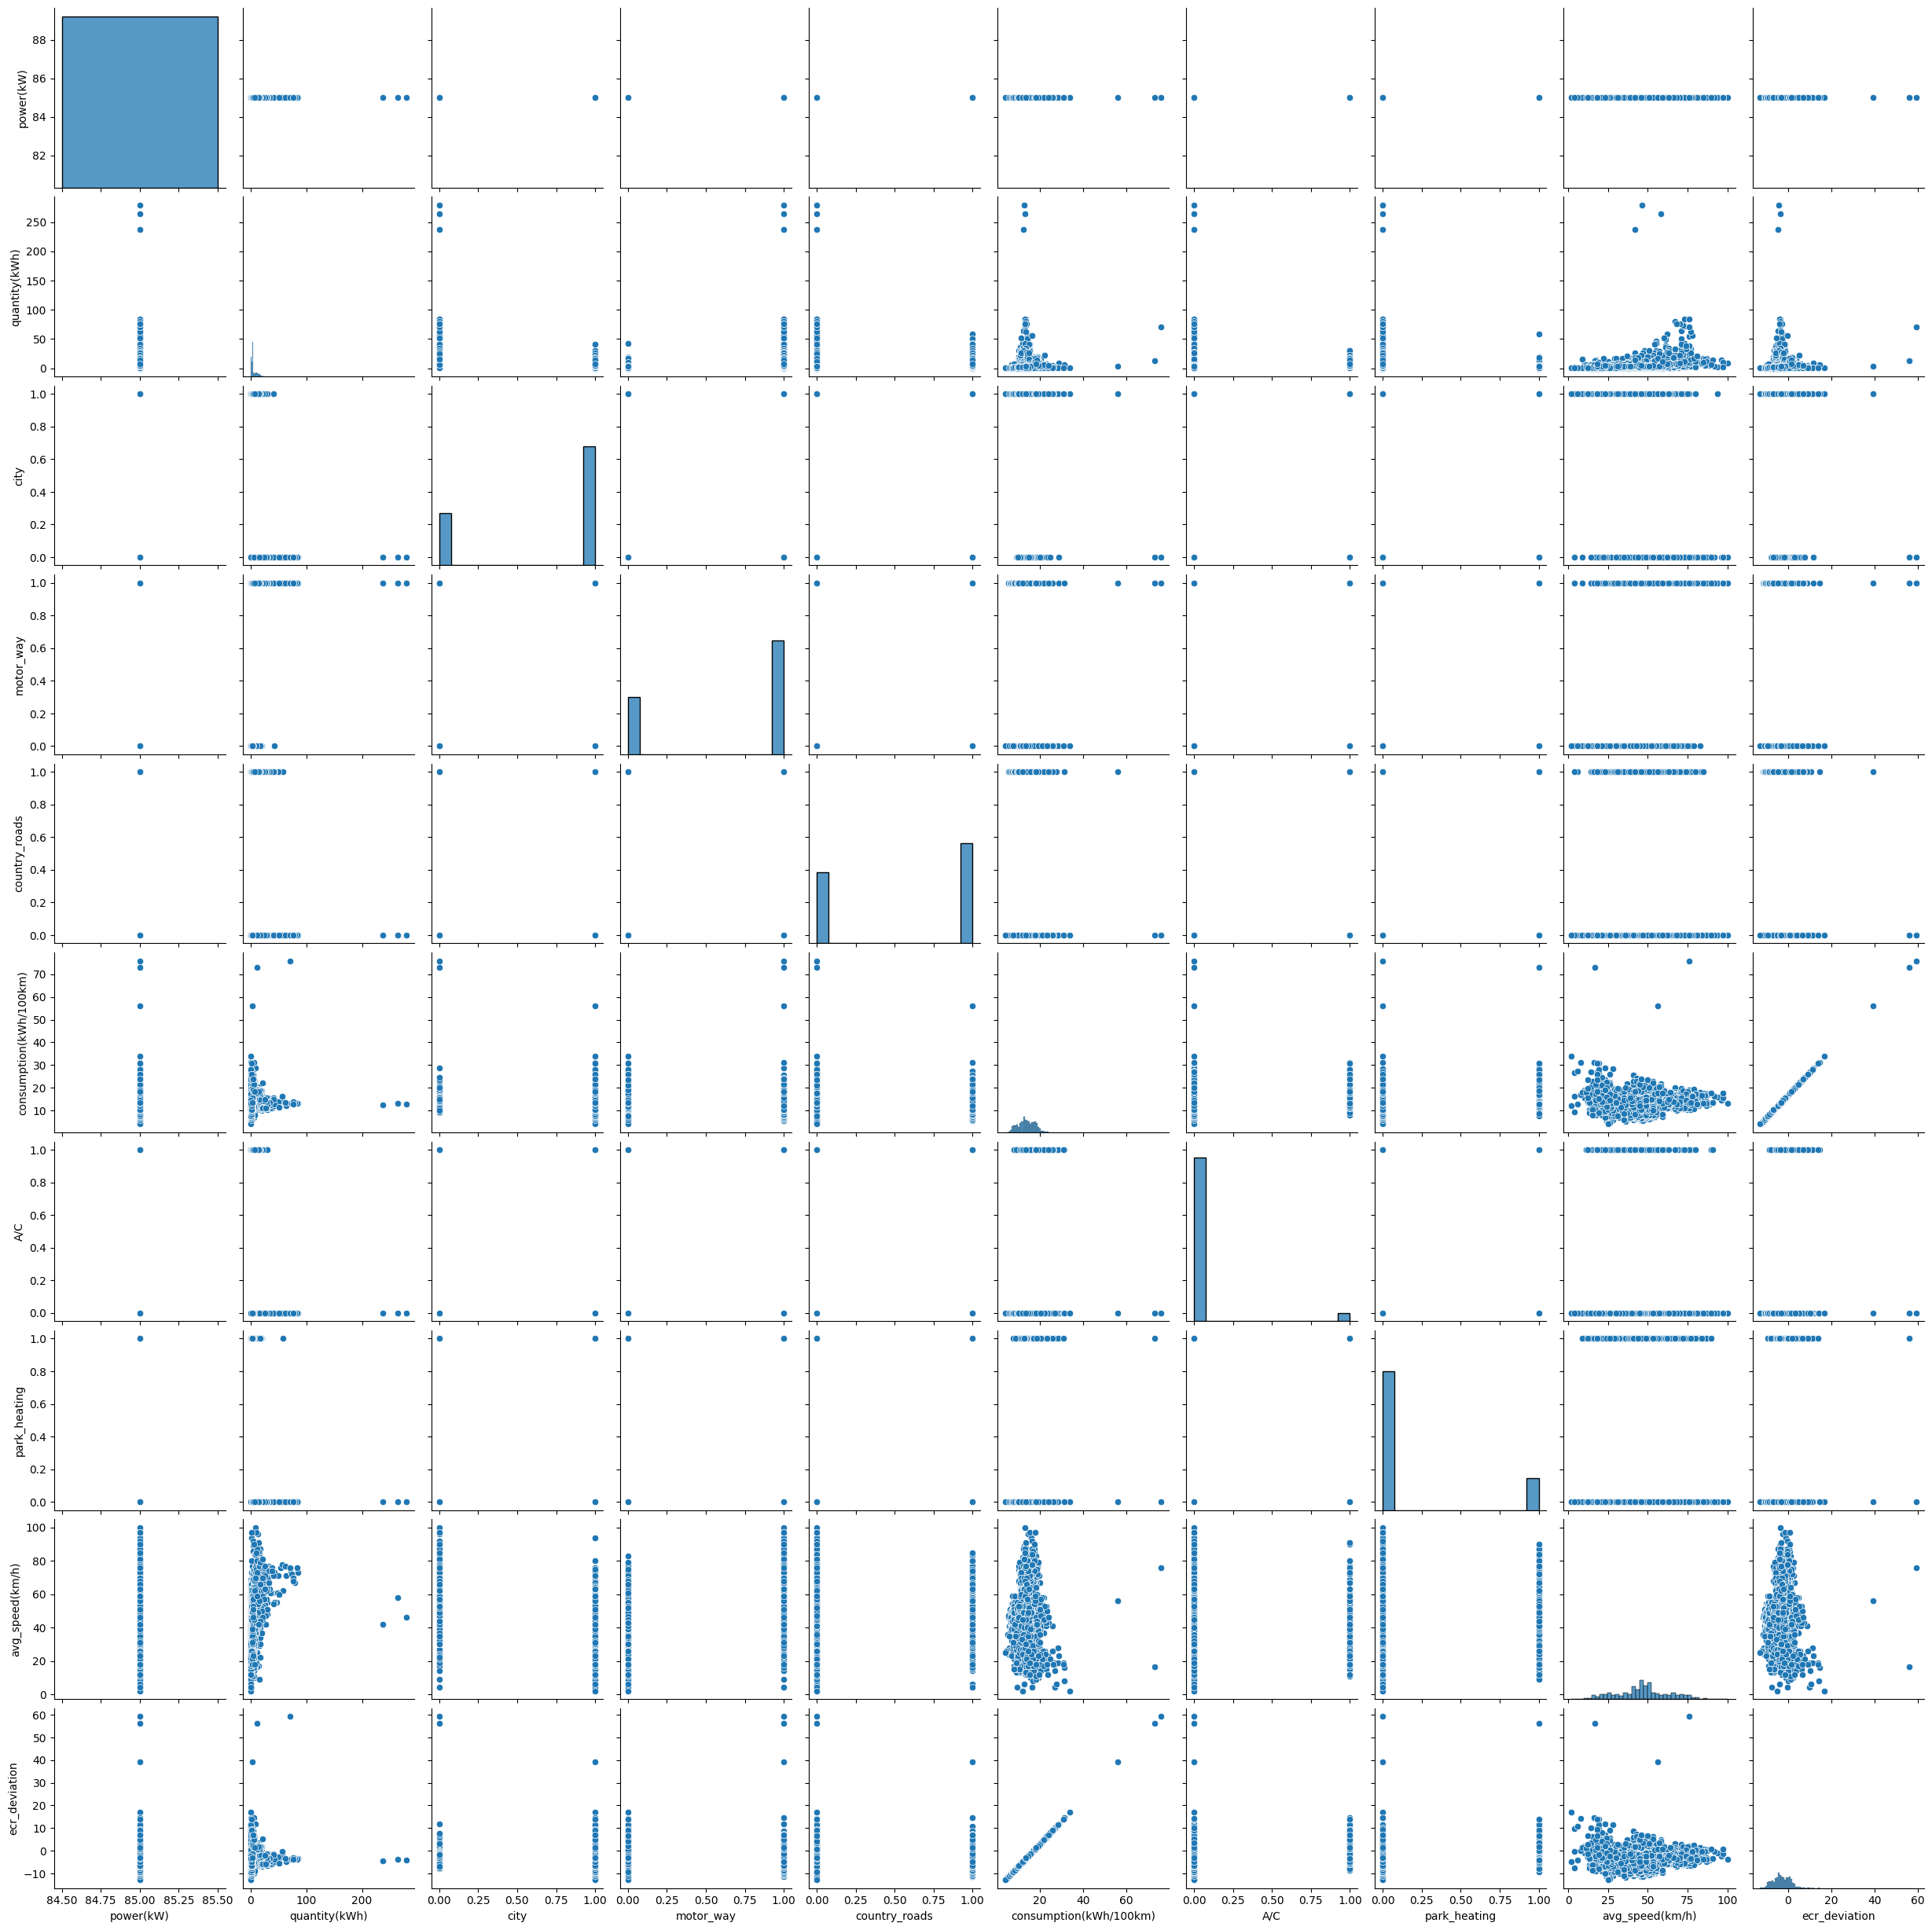

In [8]:
sns.pairplot(ev_data)

<ipython-input-100-e04e9479f043>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ev_data.corr(),annot=True)


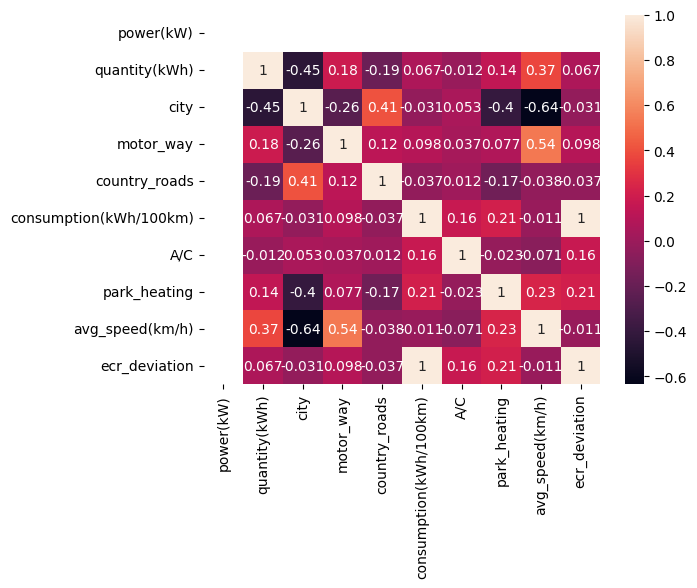

In [100]:
sns.heatmap(ev_data.corr(),annot=True)
plt.show()